In [9]:
import numpy as np
import matplotlib.pyplot as plt
import glob
from scipy.ndimage import gaussian_filter
from scipy import optimize
from astropy.io import fits

from  matplotlib.colors import Normalize
from matplotlib.colors import LogNorm

from astropy.coordinates import SkyCoord
from astropy import units as u
import time

## Read pointing list

In [10]:
pointing_list = np.loadtxt("/data/beegfs/astro-storage/groups/others/neumayer/haeberle/lvm_outsourced/guide_star_search_results_no_faint_limit/pointing_list")

In [11]:
n_pointings = pointing_list[:,0].astype(int)
ra_pointings = pointing_list[:,1]
dec_pointings = pointing_list[:,2]

In [12]:
len(pointing_list)

24595

In [13]:
folder = "/data/beegfs/astro-storage/groups/others/neumayer/haeberle/lvm_outsourced/guide_star_search_results_no_faint_limit"
#folder = "/data/beegfs/astro-storage/groups/others/neumayer/haeberle/lvm_outsourced/guide_star_search_results/"
min_mags = np.arange(10,22,1)
min_mags = np.arange(15,18,1)

n_stars_000 = np.zeros((len(n_pointings),len(min_mags)))
n_stars_060 = np.zeros((len(n_pointings),len(min_mags)))
n_stars_120 = np.zeros((len(n_pointings),len(min_mags)))
n_stars_180 = np.zeros((len(n_pointings),len(min_mags)))
n_stars_240 = np.zeros((len(n_pointings),len(min_mags)))
n_stars_300 = np.zeros((len(n_pointings),len(min_mags)))

t0 = time.time()


for index1,n_pointing in enumerate(n_pointings):
    #print(n_pointing)
    if (index1%100)==0:
        print("Pointing {} of {} (t = {:.1f} s)".format(index1,len(n_pointings),time.time()-t0))
        
    filename = folder+"/guide_stars_{:06d}_pa_000.npy".format(n_pointing)
    ras,decs,dd_x_mm,dd_y_mm,chip_xxs,chip_yys,gmag = np.load(filename).T
    for index2,mag_lim in enumerate(min_mags):
        n_stars_000[index1,index2]+=np.sum(gmag<mag_lim)
        
    filename = folder+"/guide_stars_{:06d}_pa_060.npy".format(n_pointing)
    ras,decs,dd_x_mm,dd_y_mm,chip_xxs,chip_yys,gmag = np.load(filename).T
    for index2,mag_lim in enumerate(min_mags):
        n_stars_060[index1,index2]+=np.sum(gmag<mag_lim)
        
    filename = folder+"/guide_stars_{:06d}_pa_120.npy".format(n_pointing)
    ras,decs,dd_x_mm,dd_y_mm,chip_xxs,chip_yys,gmag = np.load(filename).T
    for index2,mag_lim in enumerate(min_mags):
        n_stars_120[index1,index2]+=np.sum(gmag<mag_lim)
        
    filename = folder+"/guide_stars_{:06d}_pa_180.npy".format(n_pointing)
    ras,decs,dd_x_mm,dd_y_mm,chip_xxs,chip_yys,gmag = np.load(filename).T
    for index2,mag_lim in enumerate(min_mags):
        n_stars_180[index1,index2]+=np.sum(gmag<mag_lim)
        
    filename = folder+"/guide_stars_{:06d}_pa_240.npy".format(n_pointing)
    try:
        ras,decs,dd_x_mm,dd_y_mm,chip_xxs,chip_yys,gmag = np.load(filename).T
    except:
        print("Problems with ",filename)
        gmag = np.array([99])
    for index2,mag_lim in enumerate(min_mags):
        n_stars_240[index1,index2]+=np.sum(gmag<mag_lim)
        
    filename = folder+"/guide_stars_{:06d}_pa_300.npy".format(n_pointing)

    try:
        ras,decs,dd_x_mm,dd_y_mm,chip_xxs,chip_yys,gmag = np.load(filename).T
    except:
        print("Problems with ",filename)
        gmag = np.array([99])
    for index2,mag_lim in enumerate(min_mags):
        n_stars_300[index1,index2]+=np.sum(gmag<mag_lim)

    

Pointing 0 of 24595 (t = 0.0 s)
Pointing 100 of 24595 (t = 70.1 s)
Pointing 200 of 24595 (t = 136.2 s)
Pointing 300 of 24595 (t = 149.6 s)
Pointing 400 of 24595 (t = 172.3 s)
Pointing 500 of 24595 (t = 196.4 s)
Pointing 600 of 24595 (t = 215.3 s)
Pointing 700 of 24595 (t = 280.4 s)
Pointing 800 of 24595 (t = 324.8 s)
Pointing 900 of 24595 (t = 337.0 s)
Pointing 1000 of 24595 (t = 351.7 s)
Pointing 1100 of 24595 (t = 366.6 s)
Pointing 1200 of 24595 (t = 393.4 s)
Pointing 1300 of 24595 (t = 435.6 s)
Pointing 1400 of 24595 (t = 447.3 s)
Pointing 1500 of 24595 (t = 463.9 s)
Pointing 1600 of 24595 (t = 486.4 s)
Pointing 1700 of 24595 (t = 507.4 s)
Pointing 1800 of 24595 (t = 578.3 s)
Pointing 1900 of 24595 (t = 646.7 s)
Pointing 2000 of 24595 (t = 663.6 s)
Pointing 2100 of 24595 (t = 695.2 s)
Pointing 2200 of 24595 (t = 710.7 s)
Pointing 2300 of 24595 (t = 756.2 s)
Pointing 2400 of 24595 (t = 793.9 s)
Pointing 2500 of 24595 (t = 819.6 s)
Pointing 2600 of 24595 (t = 845.2 s)
Pointing 2700 of

In [14]:
n_stars_single = n_stars_000
n_stars_double = n_stars_000 + n_stars_180

n_stars_opti = np.max([n_stars_000+n_stars_180,n_stars_060+n_stars_240,n_stars_120+n_stars_300],axis=0)

In [15]:
n_stars_opti.shape

(24595, 3)

In [16]:
n_stars_single.shape

(24595, 3)

In [17]:
np.sum(n_stars_single[:,4]>200)

IndexError: index 4 is out of bounds for axis 1 with size 3

In [18]:
np.sum(n_stars_opti[:,4]>200)

IndexError: index 4 is out of bounds for axis 1 with size 3

In [19]:
n_stars = n_stars_single

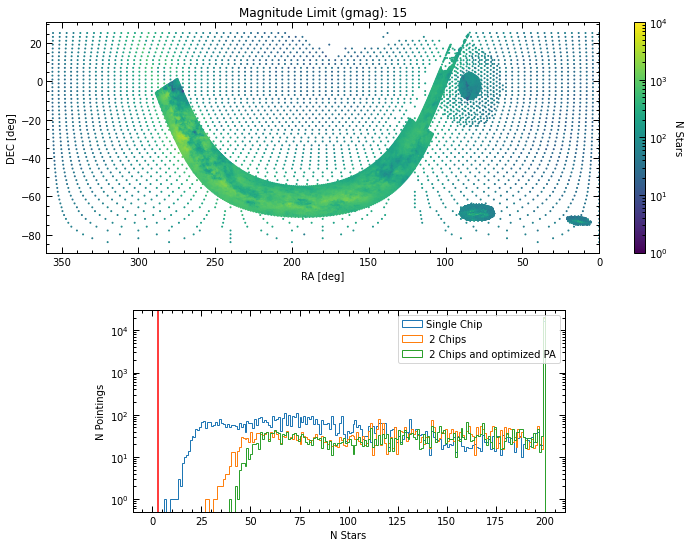

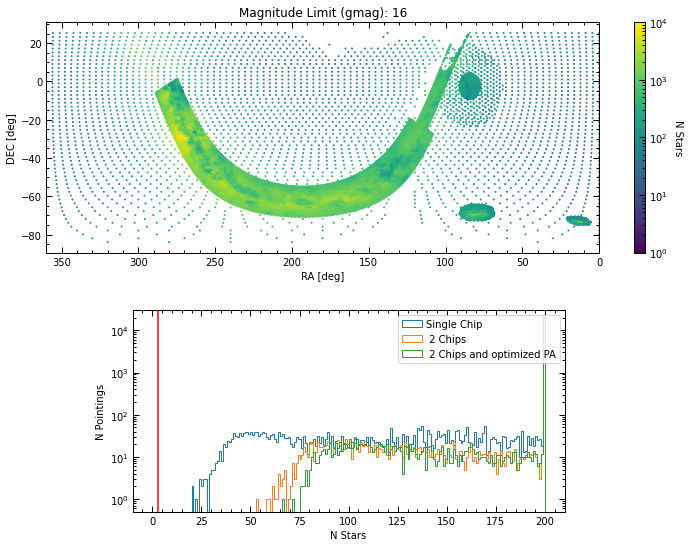

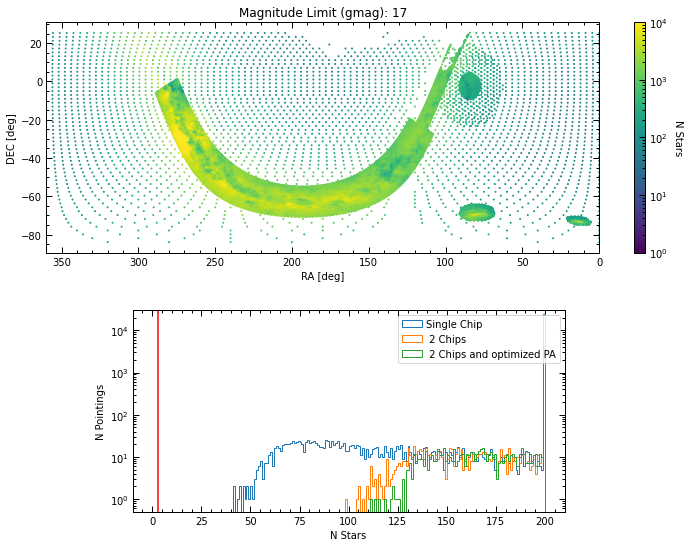

In [38]:
#Version for many separate plots

for index2,mag_lim in enumerate(min_mags[:]):
    fig = plt.figure(figsize=(12,8))
    
    ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4])
    ax2 = fig.add_axes([0.2, 0.05, 0.5, 0.35])
    
    #fig,(ax1,ax2) = plt.subplots(nrows=2,figsize=(20,16),gridspec_kw={'width_ratios': [2, 1]})
    ax1.set_title("Magnitude Limit (gmag): "+str(mag_lim))
    my_plot2 = ax1.scatter(ra_pointings[n_stars[:,index2]<3],dec_pointings[n_stars[:,index2]<3],c="r",s=1,marker="o",label="Pointings with N < 3")
    my_plot = ax1.scatter(ra_pointings[n_stars[:,index2]>=3],dec_pointings[n_stars[:,index2]>=3],c=n_stars[:,index2][n_stars[:,index2]>=3],norm=LogNorm(vmin=1,vmax=10000),s=1,marker="o",label="N stars on single Chip")
    
    my_cb = plt.colorbar(my_plot,ax=ax1)
    my_cb.ax.set_ylabel('N Stars', rotation=270)
    my_cb.ax.get_yaxis().labelpad = 15
    #my_cb.set_label ="N stars"
    #ax1.legend()
    bins = np.arange(0,201,1)
    
    ax2.hist(np.clip(n_stars_single[:,index2],bins[0],bins[-1]),bins=bins,histtype=u'step',label="Single Chip")
    ax2.hist(np.clip(n_stars_double[:,index2],bins[0],bins[-1]),bins=bins,histtype=u'step',label=" 2 Chips")
    ax2.hist(np.clip(n_stars_opti[:,index2],bins[0],bins[-1]),bins=bins,histtype=u'step', label=" 2 Chips and optimized PA")

    ax1.set_xlabel("RA [deg]")
    ax1.set_ylabel("DEC [deg]")
    
    ax2.set_xlabel("N Stars")
    ax2.set_ylabel("N Pointings")
    ax2.axvline(3,color="r")
    ax1.set_xlim(360,0)
    ax2.set_yscale("log")
    ax2.set_ylim(0.5,3e4)
    ax2.legend(loc="upper right")
    #ax2.set_xlim(0,101)
    fig.savefig("/data/beegfs/astro-storage/groups/others/neumayer/haeberle/an_transition_phase/exchange_temp/20210722_count_guidestars_{:d}.png".format(mag_lim),bbox_inches="tight",facecolor="w",edgecolor="w",dpi=200)
    
    plt.show()
#ax.plot(ra_pointings,dec_pointings,".")



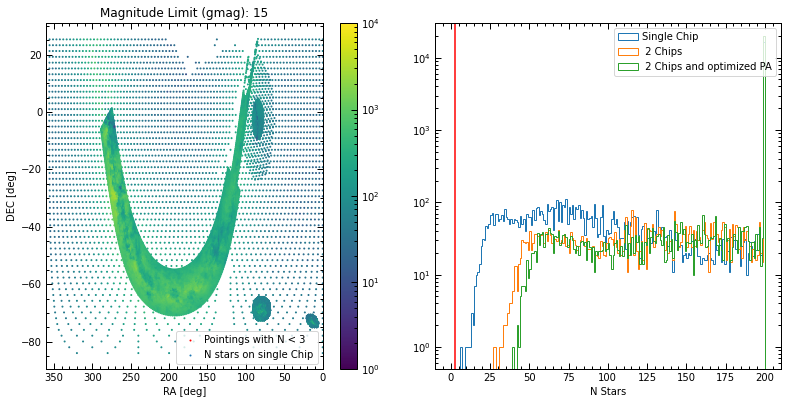

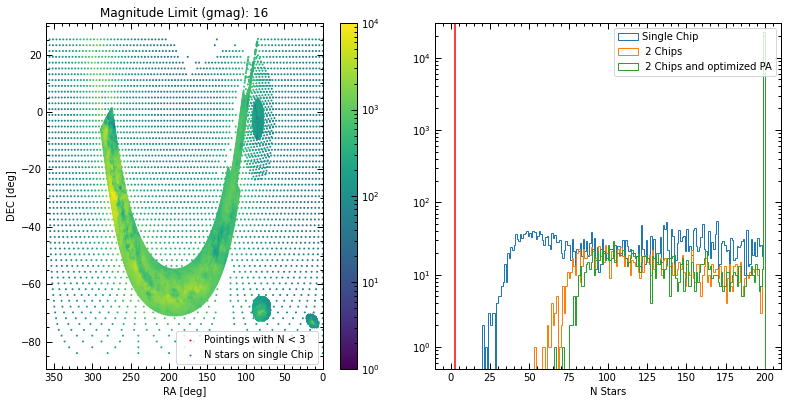

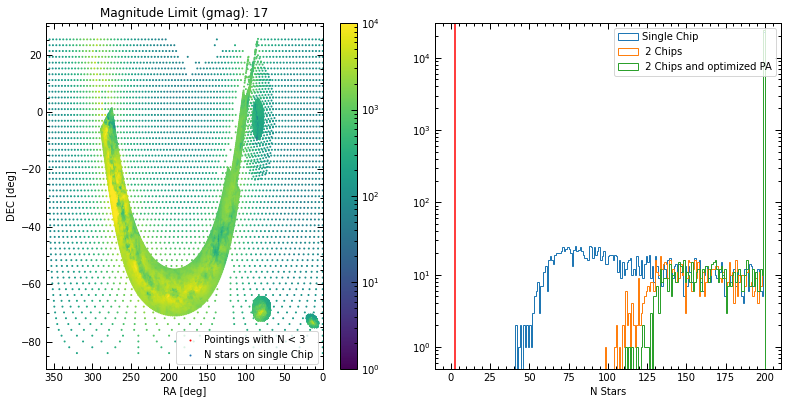

In [22]:
#Version for many separate plots

for index2,mag_lim in enumerate(min_mags[:]):
    fig = plt.figure(figsize=(12,6))
    
    ax1 = fig.add_axes([0.05, 0.1, 0.4, 0.8])
    ax2 = fig.add_axes([0.5, 0.1, 0.4, 0.8])
    
    #fig,(ax1,ax2) = plt.subplots(nrows=2,figsize=(20,16),gridspec_kw={'width_ratios': [2, 1]})
    ax1.set_title("Magnitude Limit (gmag): "+str(mag_lim))
    my_plot2 = ax1.scatter(ra_pointings[n_stars[:,index2]<3],dec_pointings[n_stars[:,index2]<3],c="r",s=1,marker="o",label="Pointings with N < 3")
    my_plot = ax1.scatter(ra_pointings[n_stars[:,index2]>=3],dec_pointings[n_stars[:,index2]>=3],c=n_stars[:,index2][n_stars[:,index2]>=3],norm=LogNorm(vmin=1,vmax=10000),s=1,marker="o",label="N stars on single Chip")
    
    my_cb = plt.colorbar(my_plot,ax=ax1)
    my_cb.set_label ="N stars"
    ax1.legend()
    bins = np.arange(0,201,1)
    
    ax2.hist(np.clip(n_stars_single[:,index2],bins[0],bins[-1]),bins=bins,histtype=u'step',label="Single Chip")
    ax2.hist(np.clip(n_stars_double[:,index2],bins[0],bins[-1]),bins=bins,histtype=u'step',label=" 2 Chips")
    ax2.hist(np.clip(n_stars_opti[:,index2],bins[0],bins[-1]),bins=bins,histtype=u'step', label=" 2 Chips and optimized PA")

    ax1.set_xlabel("RA [deg]")
    ax1.set_ylabel("DEC [deg]")
    
    ax2.set_xlabel("N Stars")
    ax2.axvline(3,color="r")
    ax1.set_xlim(360,0)
    ax2.set_yscale("log")
    ax2.set_ylim(0.5,3e4)
    ax2.legend(loc="upper right")
    #ax2.set_xlim(0,101)
    #fig.savefig("/home/haeberle/exchange/lvm/report/20210422_count_guidestars_{:d}.png".format(mag_lim),bbox_inches="tight",facecolor="w",edgecolor="w",dpi=200)
    
    plt.show()
#ax.plot(ra_pointings,dec_pointings,".")



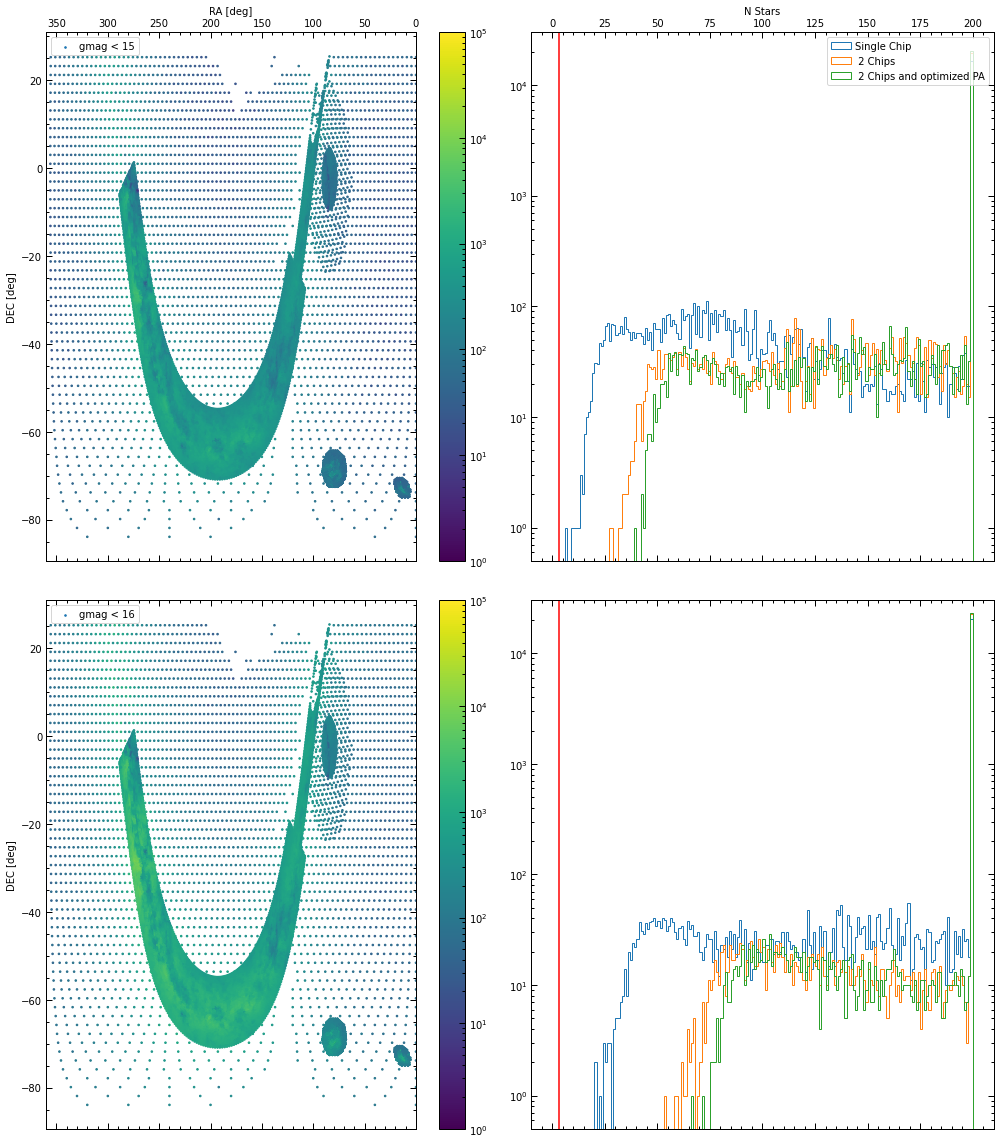

In [16]:
#Version for one single plot

fig,axarr = plt.subplots(ncols=2,nrows=len(min_mags)-1,figsize=(14,16))

for index2,mag_lim in enumerate(min_mags[:-1]):

    ax1 = axarr[index2][0]
    ax2 = axarr[index2][1]
    
    
    
    #ax1.set_title("Magnitude Limit (gmag): "+str(mag_lim))
    my_plot = ax1.scatter(ra_pointings,dec_pointings,c=n_stars[:,index2],norm=LogNorm(vmin=1,vmax=100000),s=10,marker=".",label="gmag < "+str(mag_lim))
    my_plot2 = ax1.scatter(ra_pointings[n_stars[:,index2]<3],dec_pointings[n_stars[:,index2]<3],c="w",s=10,marker=".")
    plt.colorbar(my_plot,ax=ax1)

    bins = np.arange(0,201,1)
    
    ax2.hist(np.clip(n_stars_single[:,index2],bins[0],bins[-1]),bins=bins,histtype=u'step',label="Single Chip")
    ax2.hist(np.clip(n_stars_double[:,index2],bins[0],bins[-1]),bins=bins,histtype=u'step',label=" 2 Chips")
    ax2.hist(np.clip(n_stars_opti[:,index2],bins[0],bins[-1]),bins=bins,histtype=u'step', label=" 2 Chips and optimized PA")

    
    ax1.set_ylabel("DEC [deg]")
    
    
    ax2.axvline(3,color="r")
    ax1.set_xlim(360,0)
    ax2.set_yscale("log")
    ax2.set_ylim(0.5,3e4)
    
    
    ax1.legend(loc="upper left")
    if index2 ==0:
        ax2.legend(loc="upper right")
        ax1.set_xlabel("RA [deg]")
        ax2.set_xlabel("N Stars")   
        ax1.xaxis.set_label_position('top')
        ax2.xaxis.set_label_position('top')
        ax1.tick_params(labelbottom=False,labeltop=True)
        ax2.tick_params(labelbottom=False,labeltop=True)
    if index2 ==7:
        ax1.set_xlabel("RA [deg]")
        ax2.set_xlabel("N Stars")
    elif index2!=0:
        ax1.xaxis.set_ticklabels([])
        ax2.xaxis.set_ticklabels([])
    #ax2.set_xlim(0,101)
    #fig.savefig("/home/haeberle/exchange/lvm/report/count_guidestars_{:d}.png".format(mag_lim),bbox_inches="tight",facecolor="w",edgecolor="w",dpi=200)
    
    #plt.show()
#ax.plot(ra_pointings,dec_pointings,".")

fig.tight_layout()
fig.subplots_adjust(hspace = .075)

#fig.savefig("/home/haeberle/exchange/lvm/report/count_guidestars_combined_small.png",bbox_inches="tight",facecolor="w",edgecolor="w",dpi=200)

In [17]:
fig,(ax1,ax2) = plt.subplots(nrows=2,figsize=(14,12))
    fig.suptitle("Magnitude Limit (gmag): "+str(mag_lim))
    my_plot = ax1.scatter(ra_pointings,dec_pointings,c=n_stars[:,index2],norm=LogNorm(vmin=1,vmax=10000),s=200,marker=".")
    my_plot2 = ax1.scatter(ra_pointings[n_stars[:,index2]<3],dec_pointings[n_stars[:,index2]<3],c="w",s=200,marker=".")
    plt.colorbar(my_plot,ax=ax1)
fig,ax = plt.subplots()



IndentationError: unexpected indent (<ipython-input-17-e9389ef8311b>, line 2)

In [81]:
dec_pointings.shape

(9520,)

In [77]:
5.5%5

0.5

In [82]:
n_stars[:-1].shape

(9519, 7)

In [48]:
np.argmax(n_stars[:,-1])

5419

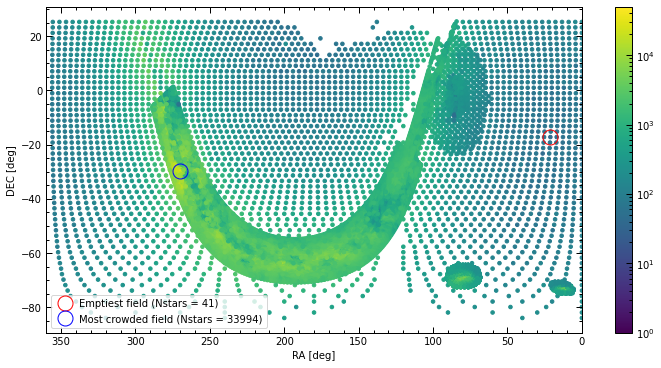

In [33]:
fig,ax1 = plt.subplots(figsize=(12,6))
#fig.suptitle("Magnitude Limit (gmag): "+str(mag_lim))
mag_lim_index=-1

n_stars = n_stars_single

my_plot = ax1.scatter(ra_pointings,dec_pointings,c=n_stars[:,mag_lim_index],norm=LogNorm(vmin=1,vmax=50000),s=50,marker=".")


ax1.plot(ra_pointings[np.argmin(n_stars[:,mag_lim_index])],dec_pointings[np.argmin(n_stars[:,mag_lim_index])],markeredgecolor="r",marker="o",ls="",ms=15,markerfacecolor="none",label="Emptiest field (Nstars = "+str(int(min(n_stars[:,mag_lim_index])))+")")
ax1.plot(ra_pointings[np.argmax(n_stars[:,mag_lim_index])],dec_pointings[np.argmax(n_stars[:,mag_lim_index])],markeredgecolor="b",marker="o",ls="",ms=15,markerfacecolor="none",label="Most crowded field (Nstars = "+str(int(max(n_stars[:,mag_lim_index])))+")")

plt.colorbar(my_plot,ax=ax1)

ax1.set_xlabel("RA [deg]")
ax1.set_ylabel("DEC [deg]")
ax1.set_xlim(360,0)
ax1.legend(loc="lower left")
#fig.savefig("/home/haeberle/exchange/lvm/report/special_fields.png".format(mag_lim),bbox_inches="tight",facecolor="w",edgecolor="w",dpi=200)

fig.savefig("nstars_for_imprs_talk.png".format(mag_lim),bbox_inches="tight",facecolor="w",edgecolor="w",dpi=200)

### Galactic coordinates

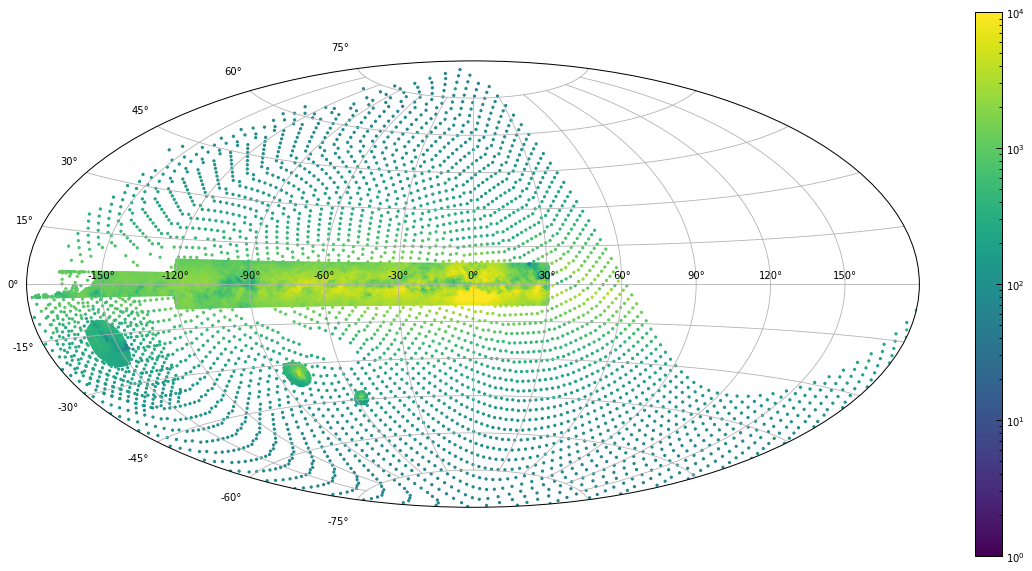

In [14]:
c = SkyCoord(ra=ra_pointings*u.degree, dec=dec_pointings*u.degree)
b = c.transform_to("galactic")

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(projection='aitoff')
ax.grid()



my_plot = ax.scatter((((b.l.value+180)%360)-180)*np.pi/180,b.b.value*np.pi/180,c=n_stars[:,-1],norm=LogNorm(vmin=1,vmax=10000),s=20,marker=".")

plt.colorbar(my_plot,ax=ax)

fig.savefig("/home/haeberle/exchange/lvm/galactic_map.png",bbox_inches="tight",facecolor="w",edgecolor="w",dpi=200)

## Synthetic image creation

In [34]:
mag_lim_index = -1
print("Mag Limit: ",min_mags[mag_lim_index])

print()
n_stars = n_stars_single
print("Single Chip: ")
print("Pointing number with smallest number of sources: {:06d} ({:d} sources)".format(np.argmin(n_stars[:,mag_lim_index]),int(np.min(n_stars[:,mag_lim_index]))))
print("Pointing number with largest number of sources:  {:06d} ({:d} sources)".format(np.argmax(n_stars[:,mag_lim_index]),int(np.max(n_stars[:,mag_lim_index]))))

print()
n_stars = n_stars_double
print("Double Chip: ")
print("Pointing number with smallest number of sources: {:06d} ({:d} sources)".format(np.argmin(n_stars[:,mag_lim_index]),int(np.min(n_stars[:,mag_lim_index]))))
print("Pointing number with largest number of sources:  {:06d} ({:d} sources)".format(np.argmax(n_stars[:,mag_lim_index]),int(np.max(n_stars[:,mag_lim_index]))))

print()
n_stars = n_stars_opti
print("Double Chip and optimized PA: ")
print("Pointing number with smallest number of sources: {:06d} ({:d} sources)".format(np.argmin(n_stars[:,mag_lim_index]),int(np.min(n_stars[:,mag_lim_index]))))
print("Pointing number with largest number of sources:  {:06d} ({:d} sources)".format(np.argmax(n_stars[:,mag_lim_index]),int(np.max(n_stars[:,mag_lim_index]))))

Mag Limit:  17

Single Chip: 
Pointing number with smallest number of sources: 001017 (41 sources)
Pointing number with largest number of sources:  005419 (33994 sources)

Double Chip: 
Pointing number with smallest number of sources: 001017 (98 sources)
Pointing number with largest number of sources:  005419 (58460 sources)

Double Chip and optimized PA: 
Pointing number with smallest number of sources: 002958 (111 sources)
Pointing number with largest number of sources:  004854 (61546 sources)


In [35]:
for mag_lim_index in range(len(min_mags)):
    

#print()
    n_stars = n_stars_single
    single_min = int(np.min(n_stars[:,mag_lim_index]))
    single_max = int(np.max(n_stars[:,mag_lim_index]))

    n_stars = n_stars_double
    double_min = int(np.min(n_stars[:,mag_lim_index]))
    double_max = int(np.max(n_stars[:,mag_lim_index]))

    n_stars = n_stars_opti
    opti_min = int(np.min(n_stars[:,mag_lim_index]))
    opti_max = int(np.max(n_stars[:,mag_lim_index]))
    
    print("{:6.3f}{:6d}{:6d}{:6d}{:6d}{:6d}{:6d}".format(min_mags[mag_lim_index],single_min,single_max,double_min,double_max,opti_min,opti_max))


15.000     6  3908    27  6683    39  7120
16.000    20 10747    53 18464    66 19797
17.000    41 33994    98 58460   111 61546


In [371]:

np.median(n_stars_single[:,mag_lim_index])

1485.0

In [373]:
np.where(n_stars_single[:,mag_lim_index]==1485.0)

(array([ 3429,  4380,  9104, 13672, 15797, 16446, 20855, 20914, 20998,
        21232]),)

In [418]:

pointing_string = "001017" #Empty
#pointing_string = "003429" #Median
#pointing_string = "005419" #Crowded

filename = "guide_star_search_results/guide_stars_"+pointing_string+"_pa_000"
#filename = "guide_star_search_results/guide_stars_005419_pa_000"

In [419]:
ras,decs,dd_x_mm,dd_y_mm,chip_xxs,chip_yys,gmag = np.loadtxt(filename)
#gmag = np.linspace(10,20,100)

In [420]:
np.median(ras)

21.160037

In [423]:
np.median(decs)

-16.72564

### Instrumental parameters and observing conditions

In [412]:
chip_height=10.2     #mm, guide chip height                    # taken from SDSS-V_0129_LVMi_PDR.pdf Table 13
chip_width=14.4
pixel_height=1100
pixel_width = 1600
image_scale=8.92 # 1arcsec in microns

sky_flux = 10 #e-/second/pixel (Half the full moon flux with optimistic assumptions)
dark_current = 15 #e-/second/pixel
readout_noise = 5 #e-


bias = 100 #e-, arbitrary value chosen to avoid negative counts

exp_time = 0.1 #s

a_telescope = np.pi*(16.2/2)**2

flux_of_vega = a_telescope * 1.6e6 #e-/sec/cm2 #This is for the optimistic case, in the pessimistic case the number would be 8.71e5
#flux_of_vega = a_telescope * 8.71e5
zp = -2.5*np.log10(flux_of_vega)

seeing_arcsec = 3.5 #fwhm


seeing_pixel = seeing_arcsec*image_scale / (chip_width/pixel_width*1000) / 2.36
print("Sigma of seeing in pixel: ",seeing_pixel)

Sigma of seeing in pixel:  1.4698681732580035


In [413]:
#Calculations based on above parameters

x_position = chip_xxs / chip_width * pixel_width
y_position = chip_yys / chip_height * pixel_height
#gmag = np.array(mags)


gaia_legend_mag = np.arange(17,4,mag_lim_index)
gaia_legend_flux= 10**(-(np.array(gaia_legend_mag)+zp)/2.5)
gaia_flux = 10**(-(gmag+zp)/2.5)


background = (sky_flux+dark_current)*exp_time
n_pix = 7*7


background_noise = np.sqrt(background+readout_noise**2)
signal = gaia_flux*exp_time
noise = np.sqrt(readout_noise**2+signal+n_pix*background)


sn = signal/noise



print("Nstars: ",x_position.shape)

Nstars:  (31745,)



### Add stars

In [414]:
star_image = np.zeros((pixel_height,pixel_width))

for index, current_flux in enumerate(gaia_flux):
    current_x = x_position[index]
    current_y = y_position[index]
    
    i = int(current_x)
    j = int(current_y)

    xx = current_x-i
    yy = current_y-j

    #
    #test_image[j,i] = current_f


    star_image[j,i] = (1-xx)*(1-yy)*current_flux*exp_time
    
    
    if i<pixel_width-1:
        star_image[j,i+1] = (xx)*(1-yy)*current_flux*exp_time
    if j< pixel_height-1:
        star_image[j+1,i] = (1-xx)*(yy)*current_flux*exp_time
    if (i<pixel_width-1) & (j<pixel_height-1):
        star_image[j+1,i+1] = (xx)*(yy)*current_flux*exp_time
    
    #star_image[int(current_y),int(current_x)] = current_flux*exp_time

    
star_image_c = gaussian_filter(star_image, sigma=seeing_pixel,mode="constant")


star_image_c_noise = np.random.poisson(lam=star_image_c,size = star_image_c.shape)


### Add Background

In [415]:
background_array = np.random.poisson(background,size=star_image.shape)

readout_noise_array = np.random.normal(loc=0,scale = readout_noise,size=star_image.shape)

combined = star_image_c_noise + background_array + readout_noise_array + bias

#hdu = fits.PrimaryHDU(star_image_c)
#hdu.writeto("/home/haeberle/exchange/lvm/synthetic_image_sparse_field_5s.fits",overwrite=True)

hdu = fits.PrimaryHDU(combined)


filename = "/home/haeberle/exchange/lvm/synthetic_images/pointing_"+pointing_string+"_{:d}ms.fits".format(int(1000*exp_time))
print("writing file: ",filename)
hdu.writeto(filename,overwrite=False)


writing file:  /home/haeberle/exchange/lvm/synthetic_images/pointing_005419_100ms.fits


OSError: File '/home/haeberle/exchange/lvm/synthetic_images/pointing_005419_100ms.fits' already exists.

### Plot images

In [ ]:
fig,ax = plt.subplots(figsize=(8,4))
ax.set_title("{} of {} stars have a S/N > 5".format(np.sum(sn>5),len(sn)))
ax.plot(gmag,sn,"k.")
ax.grid()
ax.axhline(5,color="r",ls="--",label=" S/N = 5")
ax.set_yscale("log")
ax.set_xlabel("Gaia gmag")
ax.set_ylabel("S/N")
ax.legend()

fig,ax = plt.subplots(figsize=(8,4))
#ax.set_title("{} of {} stars have a S/N > 5".format(np.sum(sn>5),len(sn)))
ax.plot(gmag,sn1,"c",label="1 s")
ax.plot(gmag,sn5,"b",label="5 s")
ax.plot(gmag,sn25,"k",label="25 s")
ax.grid()
ax.axhline(5,color="r",ls="--",label=" S/N = 5")
ax.set_yscale("log")
ax.set_xlabel("Gaia gmag")
ax.set_ylabel("S/N")
ax.legend()
#fig.savefig("/home/haeberle/exchange/lvm/report/sn_pessimistic.png".format(mag_lim),bbox_inches="tight",facecolor="w",edgecolor="w",dpi=200)


Text(0.5, 0.98, 'Pointing: 005419\nExp. time: 0.1 s')

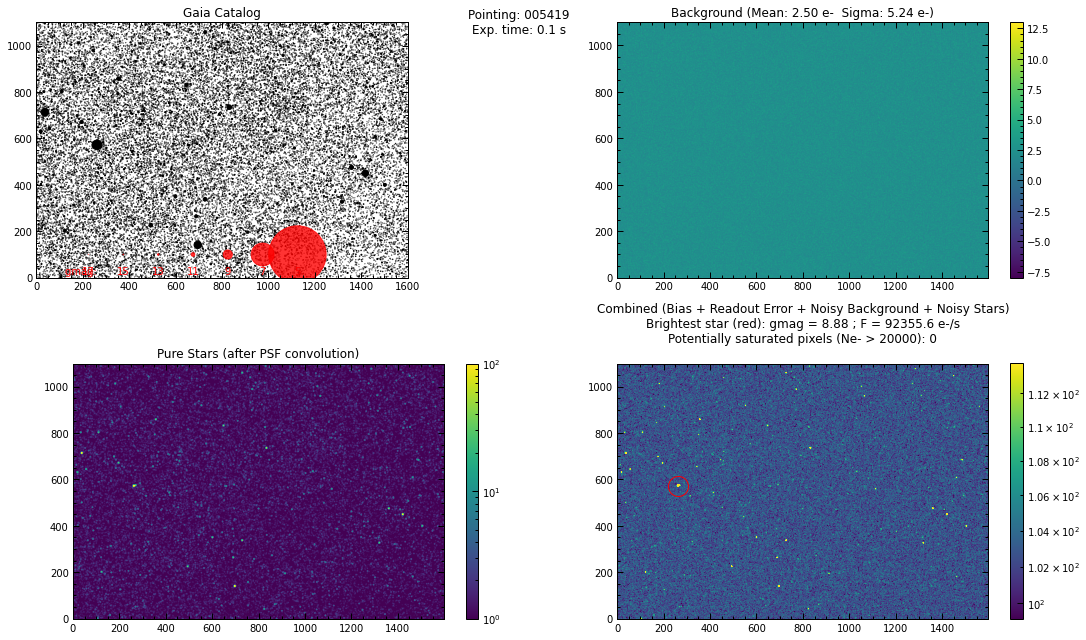

In [416]:
fig,((ax,ax2),(ax3,ax4)) = plt.subplots(figsize=(16,9),ncols=2,nrows=2)



ax.set_title("Gaia Catalog")
ax.scatter(x_position,y_position,s=gaia_flux/1000,c="k")
ax.set_aspect("equal")
text_x = 1500-gaia_legend_mag*75#-300
text_y = 100*np.ones_like(gaia_legend_mag)
ax.scatter(text_x,text_y,s=gaia_legend_flux/1000,c="r",alpha=0.8)
for n,current_gmag in enumerate(gaia_legend_mag):
    ax.text(text_x[n],text_y[n]-85,"{}".format(current_gmag),c="r",ha="center")
    
ax.text(text_x[0]-100,text_y[0]-85,"gmag: ",c="r")

ax.set_ylim(0,pixel_height)
ax.set_xlim(0,pixel_width)


vmin3 = 1#np.percentile(star_image_c,50)
vmax3 = np.percentile(star_image_c,99.9)
my_plot = ax3.imshow(star_image_c+1,origin="lower",norm=LogNorm(vmin=1, vmax=100))
plt.colorbar(my_plot,ax=ax3,fraction=0.046, pad=0.04)
ax3.set_title("Pure Stars (after PSF convolution)")


#fig,ax = plt.subplots(figsize=(16,12))
my_plot2 = ax2.imshow(background_array,origin="lower",vmin=background-2*background_noise,vmax=background+2*background_noise)#,vmin=5,vmax=20)
ax2.set_title("Background (Mean: {:.2f} e-  Sigma: {:.2f} e-)".format(background,background_noise))
plt.colorbar(my_plot2,ax=ax2,fraction=0.046, pad=0.04)

#fig,ax = plt.subplots(figsize=(16,12))

vmin4 = np.percentile(combined,25)
vmax4 = np.percentile(combined,98)

my_plot4 = ax4.imshow(combined,origin="lower",norm=LogNorm(vmin=np.max([vmin4,1]), vmax=vmax4))
if np.sum(sn>5) < 10:
    ax4.set_title("Combined (Bias + Readout Error + Noisy Background + Noisy Stars)\nBrightest star (red): gmag = {:.2f} ; F = {:.1f} e-/s\nPotentially saturated pixels (Ne- > 20000): {}\nWhite circle around all stars with S/N > 5 (N = {})".format(np.min(gmag),gaia_flux[np.argmin(gmag)],np.sum(combined>20000),np.sum(sn>5)))
    ax4.plot(x_position[sn>5],y_position[sn>5],"o",ms=40,markerfacecolor="none",markeredgecolor="w",label="gmag < 12")
else:
    ax4.set_title("Combined (Bias + Readout Error + Noisy Background + Noisy Stars)\nBrightest star (red): gmag = {:.2f} ; F = {:.1f} e-/s\nPotentially saturated pixels (Ne- > 20000): {}\n".format(np.min(gmag),gaia_flux[np.argmin(gmag)],np.sum(combined>20000)))
ax4.plot(x_position[np.argmin(gmag)],y_position[np.argmin(gmag)],"o",ms=20,markerfacecolor="none",markeredgecolor="r",label="gmag < 12")
plt.colorbar(my_plot4,ax=ax4,fraction=0.046, pad=0.04)
#plt.colorbar(my_plot4,ax=ax,fraction=0.046, pad=0.04)
#ax4.legend()

fig.tight_layout()
fig.suptitle("Pointing: "+pointing_string+"\nExp. time: "+str(exp_time)+" s")
#fig.savefig("/home/haeberle/exchange/lvm/report/example_crowded_field.png",dpi=200,bbox_inches="tight",edgecolor="white",facecolor="white")
#fig.savefig("/home/haeberle/exchange/lvm_guidestars_synthetic_image.png",dpi=200,bbox_inches="tight",edgecolor="white",facecolor="white")

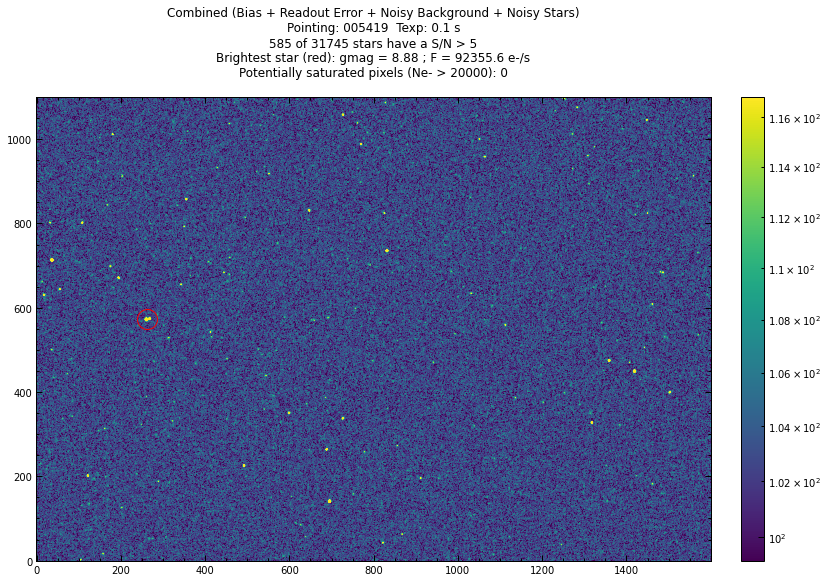

In [417]:
fig,ax4 = plt.subplots(figsize=(12,8))

vmin4 = np.percentile(combined,25)
vmax4 = np.percentile(combined,99.5)

my_plot4 = ax4.imshow(combined,origin="lower",norm=LogNorm(vmin=np.max([vmin4,1]), vmax=vmax4))
if np.sum(sn>5) < 10:
    ax4.set_title("Combined (Bias + Readout Error + Noisy Background + Noisy Stars)\nBrightest star (red): gmag = {:.2f} ; F = {:.1f} e-/s\nPotentially saturated pixels (Ne- > 20000): {}\nWhite circle around all stars with S/N > 5 (N = {})".format(np.min(gmag),gaia_flux[np.argmin(gmag)],np.sum(combined>20000),np.sum(sn>5)))
    ax4.plot(x_position[sn>5],y_position[sn>5],"o",ms=40,markerfacecolor="none",markeredgecolor="w",label="gmag < 12")
else:
    ax4.set_title("Combined (Bias + Readout Error + Noisy Background + Noisy Stars)\nPointing: {}  Texp: {} s\n{} of {} stars have a S/N > 5\nBrightest star (red): gmag = {:.2f} ; F = {:.1f} e-/s\nPotentially saturated pixels (Ne- > 20000): {}\n".format(pointing_string,exp_time,np.sum(sn>5),len(gmag),np.min(gmag),gaia_flux[np.argmin(gmag)],np.sum(combined>20000)))
ax4.plot(x_position[np.argmin(gmag)],y_position[np.argmin(gmag)],"o",ms=20,markerfacecolor="none",markeredgecolor="r",label="gmag < 12")
plt.colorbar(my_plot4,ax=ax4,fraction=0.046, pad=0.04)
#plt.colorbar(my_plot4,ax=ax,fraction=0.046, pad=0.04)
#ax4.legend()

fig.tight_layout()

filename = "/home/haeberle/exchange/lvm/report/pointing_"+pointing_string+"_{:d}ms.png".format(int(1000*exp_time))
#fig.suptitle()
#fig.savefig("/home/haeberle/exchange/lvm/report/example_crowded_field.png",dpi=200,bbox_inches="tight",edgecolor="white",facecolor="white")
fig.savefig(filename,dpi=200,bbox_inches="tight",edgecolor="white",facecolor="white")

Text(0.5, 0, 'N e-')

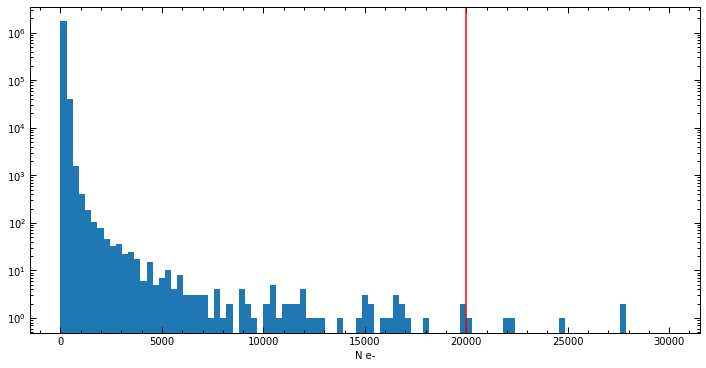

In [174]:
fig, ax = plt.subplots(figsize=(12,6))

ax.hist(combined.flatten(),bins=np.linspace(0,30000,100))
ax.axvline(20000,color="r")
ax.set_yscale("log")
ax.set_xlabel("N e-")
#ax.set_xscale("log")

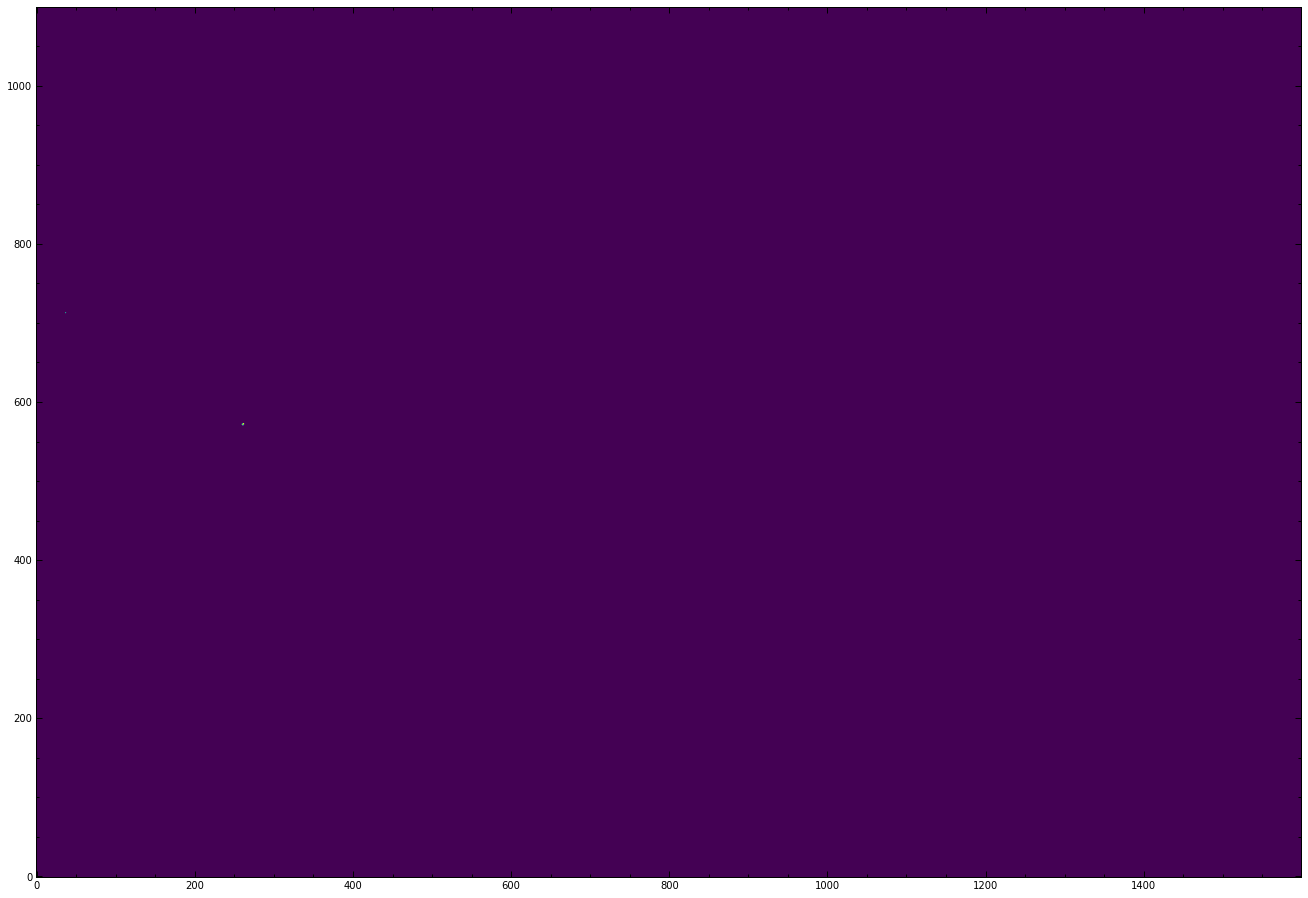

In [175]:
fig,ax = plt.subplots(figsize=(24,16))

ax.imshow(combined>20000,origin="lower")

In [68]:
combined.max()

29984.25056385428

In [113]:
combined.max()

194688.691583654

In [109]:
np.percentile(combined,98)

200.77052344231691

In [110]:
vmin4

119.91922824413089

### Test centroiding

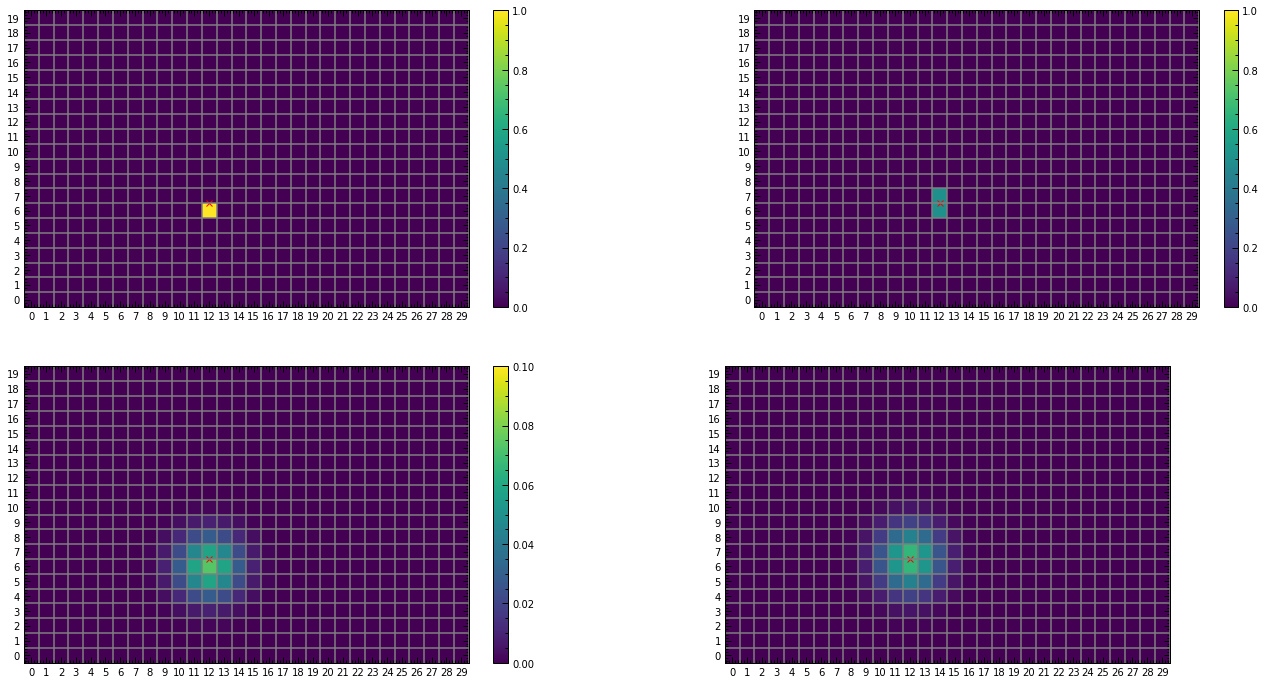

In [111]:
test_image = np.zeros((20,30))
test_image2= np.zeros((20,30))
current_x = 12.0
current_y = 6.5
current_f = 1

i = int(current_x)
j = int(current_y)

xx = current_x-i
yy = current_y-j

test_image[j,i] = current_f

test_image2[j,i] = (1-xx)*(1-yy)*current_f
test_image2[j,i+1] = (xx)*(1-yy)*current_f
test_image2[j+1,i] = (1-xx)*(yy)*current_f
test_image2[j+1,i+1] = (xx)*(yy)*current_f


fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(24,12))

im1 = ax1.imshow(test_image,vmin=0,vmax=1,origin="lower")
im2 = ax2.imshow(test_image2,vmin=0,vmax=1,origin="lower")

test_image3 = gaussian_filter(test_image, sigma=seeing_pixel,mode="constant")
test_image4 = gaussian_filter(test_image2, sigma=seeing_pixel,mode="constant")

im3 = ax3.imshow(test_image3,vmin=0,vmax=0.1,origin="lower")
im4 = ax4.imshow(test_image4,vmin=0,vmax=0.1,origin="lower")


for ax in [ax1,ax2,ax3,ax4]:
    ax.plot(current_x,current_y,"rx")
    ax.set_xticks(np.arange(0.0,30,1))
    ax.set_yticks(np.arange(0.0,20,1))
    #ax.grid()

    for x in np.arange(0.5,30,1):
        ax.axvline(x,color="0.5")
    for y in np.arange(0.5,20,1):
        ax.axhline(y,color="0.5")
plt.colorbar(im1,ax=ax1,fraction=0.046, pad=0.04)
plt.colorbar(im2,ax=ax2,fraction=0.046, pad=0.04)
plt.colorbar(im3,ax=ax3,fraction=0.046, pad=0.04)

In [91]:
def find_com(ii,jj,image,a=5):
    x_values = np.arange(ii-a,ii+a+1)
    y_values = np.arange(jj-a,jj+a+1)


    combined = np.stack((np.tile(y_values,2*a+1),np.repeat(x_values,2*a+1)),axis=1)

    x_sum = 0
    y_sum = 0
    n_sum = 0
    for coords in combined:
        #print(coords[1],coords[0])
        x_sum+=(coords[1]) * image[coords[0],coords[1]]
        y_sum+=(coords[0]) * image[coords[0],coords[1]]

        n_sum+=image[coords[0],coords[1]]
        
    x_com = x_sum/n_sum
    y_com = y_sum/n_sum
    
    return x_com,y_com


def gaussian(height, center_x, center_y, width_x, width_y):
    """Returns a gaussian function with the given parameters"""
    width_x = float(width_x)
    width_y = float(width_y)
    return lambda x,y: height*np.exp(
                -(((center_x-x)/width_x)**2+((center_y-y)/width_y)**2)/2)

def moments(data):
    """Returns (height, x, y, width_x, width_y)
    the gaussian parameters of a 2D distribution by calculating its
    moments """
    total = data.sum()
    X, Y = np.indices(data.shape)
    x = (X*data).sum()/total
    y = (Y*data).sum()/total
    col = data[:, int(y)]
    width_x = np.sqrt(np.abs((np.arange(col.size)-x)**2*col).sum()/col.sum())
    row = data[int(x), :]
    width_y = np.sqrt(np.abs((np.arange(row.size)-y)**2*row).sum()/row.sum())
    height = data.max()
    return height, x, y, width_x, width_y

def fitgaussian(data):
    """Returns (height, x, y, width_x, width_y)
    the gaussian parameters of a 2D distribution found by a fit"""
    params = moments(data)
    errorfunction = lambda p: np.ravel(gaussian(*p)(*np.indices(data.shape)) -
                                 data)
    p, success = optimize.leastsq(errorfunction, params)
    return p

In [92]:
jj,ii = np.unravel_index(test_image4.argmax(), test_image4.shape)

x_brightest = ii
y_brightest = jj

a = 5

x_com,y_com = find_com(ii,jj,test_image4,a=a)

gauss_height, gauss_center_y, gauss_center_x, gauss_width_y, gauss_width_x = fitgaussian(test_image4[jj-a:jj+a+1,ii-a:ii+a+1])



gauss_center_x+=ii-a
gauss_center_y+=jj-a


print("Original position:   x = {:6.3f}    y = {:6.3f}".format(current_x,current_y))
print("Brightest pixel:     x = {:6.3f}    y = {:6.3f}".format(x_brightest,y_brightest))
print("Center of mass:      x = {:6.3f}    y = {:6.3f}".format(x_com,y_com))
print("Fit of 2D Gaussian:  x = {:6.3f}    y = {:6.3f}  (Seeing x: {:6.3f} Seeing y: {:6.3f})".format(gauss_center_x,gauss_center_y,gauss_width_x*2.36,gauss_width_y*2.36))

Original position:   x = 12.000    y =  6.500
Brightest pixel:     x = 12.000    y =  6.000
Center of mass:      x = 12.000    y =  6.498
Fit of 2D Gaussian:  x = 12.000    y =  6.500  (Seeing x:  3.469 Seeing y:  3.675)
